
# Project: Wrangle and Analyze data 


## Author: Robert HROMADA (SVK)

### Table of Contents
    
<ul>
<li><a href="#Gathering Data">Part I - Gathering Data</a></li>
<li><a href="#Assessing Data">Part II - Assessing Data</a></li>
<a href="#Assessing Sumary">Assessing Sumary</a>
<li><a href="#Cleaning Data">Part III - Cleaning Data</a></li>
<li><a href="#Store">Part IV - Storing Final Dataset</a></li>   
<li><a href="#Visualization">Part V - Data Visualization</a></li>
<li><a href="#Resources">Resources</a></li>
</ul>

In [1]:
import requests
import numpy as np
import os
import pandas as pd
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

pd.set_option('display.max_colwidth', 400)

import re

import matplotlib.pyplot as plt                                      
%matplotlib inline
from matplotlib import cm as cm

import seaborn as sns

<a id='Gathering Data'></a>
## Part I - Gathering Data

In [2]:
#read given twitter_archive_enhanced.csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv', encoding='utf-8')
archive_df.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None


In [3]:
archive_df.shape

(2356, 17)

In [37]:
# download image_prediction.tsv file from given ulr

url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

folder_name = 'image-predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
with open(os.path.join(folder_name, url.split('/')[-1]), mode='wb') as file:
    file.write(response.content)

In [5]:
# read downloaded image-predistins.tsv file
image_predictions_df = pd.read_csv(folder_name + '/image-predictions.tsv', sep='\t')
image_predictions_df.head(3)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


In [6]:
image_predictions_df.shape

(2075, 12)

In [7]:
# Tweeter API setting
# These keys cannot be share

api_key = 'XXXXXXXXXXXXXXXXXXXXXXXXX'
api_secret_key = 'XXXXXXXXXXXXXXXXXXXXXXXX'
access_token = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'
access_secret = 'XXXXXXXXXXXXXXXXXXXXXXXXXXX'

auth = tweepy.OAuthHandler(api_key, api_secret_key)
auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

api

In [8]:
# download Twitter archive with additional information

tweet_ids = list(archive_df.tweet_id)

tweets_data = []
tweet_success = []
tweet_failure = []

count_failure = 0
start = timer()

for tweet_id in tweet_ids:
    try:
        data = api.get_status(tweet_id, tweet_mode='extended', parser=tweepy.parsers.JSONParser(),
                          wait_on_rate_limit = True, wait_on_rate_limit_notify = True)
        tweets_data.append(data)
        tweet_success.append(tweet_id)

    except tweepy.TweepError as e:
        tweet_failure.append(tweet_id)
        count_failure += 1
        print(tweet_id, e)

end = timer()


# print total number of failure and total archive reading time
total_failure = "Number of failure = " + str(count_failure) + " /"
total_time = "Archive reading time = " + str(end - start)

print(total_failure, total_time) 

with open('tweet_json.txt', 'w') as file:

    json.dump(tweets_data, file)

888202515573088257 [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937 [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745 [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130 [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560 [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984 [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 [{'code': 144, 'message': 'No status found with that ID.'}]
837366284874571778 [{'code': 144, 'message': 'No sta

Rate limit reached. Sleeping for: 426


754011816964026368 [{'code': 144, 'message': 'No status found with that ID.'}]
680055455951884288 [{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 423


Number of failure = 25 / Archive reading time = 2407.0597625


#### Quality issue

*q1 - 25 missing tweet_id*

In [9]:
# read data from tweet_json.txt

tweets_info_list = [] 

with open('tweet_json.txt', 'r') as json_file:
    tweet_json = json.load(json_file) 
    
    for line in range(len(tweet_json)):

        tweet_id = tweet_json[line]['id']
        retweets = tweet_json[line]['retweet_count']
        retweeted = tweet_json[line]['retweeted']
        favourites = tweet_json[line]['favorite_count']
        followers = tweet_json[line]['user']['followers_count']
      
        tweets_info_list.append({'tweet_id': tweet_id, 'retweet_count' : retweets, 'favourite_count': favourites,
                                 'followers_count' : followers, 'retweeted' : retweeted })
    
tweets_info_df = pd.DataFrame(tweets_info_list, columns = ['tweet_id', 'retweet_count', 'favourite_count',
                                                           'followers_count', 'retweeted'])
tweets_info_df.sample(10)



,tweet_id,retweet_count,favourite_count,followers_count,retweeted
28,886366144734445568,2895,19883,8772437,False
273,838916489579200512,35,0,8772445,False
295,835536468978302976,1708,0,8772445,False
903,754874841593970688,7989,0,8772458,False
1669,681297372102656000,951,3206,8772467,False
1621,683849932751646720,965,2608,8772466,False
1090,732732193018155009,535,2432,8772465,False
64,879492040517615616,2918,22096,8772440,False
1540,688116655151435777,771,2827,8772465,False
1080,735137028879360001,966,3125,8772464,False


In [10]:
tweets_info_df.shape

(2331, 5)

#### Final Gathered Data


archive_df - "twitter-archive-enhanced.csv" converted into a dataframe and gives information on basic tweet data

tweets_info_df - dataset contains information like tweet_id, number of retweets and number of favorites

image_predictions_df - a dataset contains information about predictions about the image

<a id='Assessing Data'></a>
## Part II - Assessing Data

##### Assesing of archive_df (twitter-archive-enhanced.csv)

In [11]:
archive_df.shape

(2356, 17)

In [12]:
archive_df.head(4)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None


In [13]:
archive_df.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo'],
      dtype='object')

#### Description of 'archive_df' columns:  <a href="#[1]">[1]</a> , <a href="#[2]">[2]</a>, <a href="#[3]">[3]</a>

* tweet_id: tweet_id is the last part of the tweet URL after "status/"
* in_reply_to_status_id: if  tweet_id:tweet is a reply, the Twitter identifier of the tweet that is being replied to
* in_reply_to_user_id: if tweet is a reply, the Twitter identifier of the author of the tweet that is being replied to
* timestamp: time & date of tweet
* source: the web link as source
* text: tweet text
* retweeted_status_id: the unique identifier for the original Tweet if this is a retweet, otherwise it is null
* retweeted_status_user_id: unique identifier of the original Tweet’s author
* retweeted_status_timestamp: time & date of retweet
* expanded_urls: expanded version of url1
* rating_numerator: "The numerators, though? Almost always greater than 10"
* rating_denominator: "almost always have a denominator of 10"
* name: dog name
* doggo: dog "stage"
* floofer: dog "stage"
* pupper: dog "stage"
* puppo: dog "stage"

#### Quality issue
*q2 - value in columns doggo, floofer, pupper & puppo is "None" instead of "NaN"*

In [14]:
#check posiible duplicity of tweet_id
archive_df[archive_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


#### check how many retweets is in dataset

**If tweet is a reply, 'retweeted_status_id' - identifier of the tweet that is being replied to is not zero. <a href="#[1]">[1]</a>**
 
Same is appliccable to column 'retweeted_status_user_id' & 'retweeted_status_timestamp'

In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [16]:
type(archive_df['timestamp'][0])

str

In [17]:
type(archive_df['retweeted_status_timestamp'][0])

float

In [18]:
type(archive_df['retweeted_status_timestamp'][0])

float

#### Quality issue
*q3 - id values should be int64 {column name (original data type)}*
    1. in_reply_to_status_id (float64)
    2. in_reply_to_user_id (float64)
    3. retweeted_status_id (float64)
    4. retweeted_status_user_id (float64)

*q4 - timestamp & retweeted_status_timestamp has to be date format*

*q5 - in dataset there are 181 retweets* <a href="#[1]">[1]</a> , <a href="#[2]">[2]</a>, <a href="#[3]">[3]</a>. **Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.**

#### Tidiness issue
*t1 - doggo, floofer, pupper, puppo contains information about the stage of the dog, it should be in one column*

In [19]:
archive_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

#### Quality issue
*q6 - missing values in following columns*
    1. in_reply_to_status_id
    2. in_reply_to_user_id
    3. retweeted_status_id
    4. retweeted_status_user_id
    5. retweeted_status_timestamp
    6. expanded_urls

In [20]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [21]:
#identify tweet_id with denominator  0
archive_df[archive_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


#### Quality issue
*q7 - denominator "0" fo tweet_id 835246439529840640*

In [22]:
#Checking the values of rating_numerator 
archive_df['rating_numerator'].value_counts().sort_values()

20        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
26        1
182       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
143       1
24        1
204       1
80        1
121       1
75        2
15        2
0         2
420       2
2         9
1         9
4        17
3        19
6        32
5        37
14       54
7        55
8       102
9       158
13      351
10      461
11      464
12      558
Name: rating_numerator, dtype: int64

#### Quality issue
*q8 - rating_numerator have some incosistent values*
        we can say that same values can be classified as outliners 

In [23]:
#Checking the values of rating_denominator 
archive_df['rating_denominator'].value_counts().sort_values()

70        1
170       1
150       1
130       1
120       1
110       1
90        1
15        1
0         1
40        1
16        1
2         1
7         1
20        2
80        2
50        3
11        3
10     2333
Name: rating_denominator, dtype: int64

In [24]:
# Checking dog names
dog_names_list = []
dog_names_list = archive_df['name'].unique()
dog_names_list.sort()
dog_names_list

array(['Abby', 'Ace', 'Acro', 'Adele', 'Aiden', 'Aja', 'Akumi', 'Al',
       'Albert', 'Albus', 'Aldrick', 'Alejandro', 'Alexander',
       'Alexanderson', 'Alf', 'Alfie', 'Alfy', 'Alice', 'Amber',
       'Ambrose', 'Amy', 'Amélie', 'Anakin', 'Andru', 'Andy', 'Angel',
       'Anna', 'Anthony', 'Antony', 'Apollo', 'Aqua', 'Archie', 'Arlen',
       'Arlo', 'Arnie', 'Arnold', 'Arya', 'Ash', 'Asher', 'Ashleigh',
       'Aspen', 'Astrid', 'Atlas', 'Atticus', 'Aubie', 'Augie', 'Autumn',
       'Ava', 'Axel', 'Bailey', 'Baloo', 'Balto', 'Banditt', 'Banjo',
       'Barclay', 'Barney', 'Baron', 'Barry', 'Batdog', 'Bauer', 'Baxter',
       'Bayley', 'BeBe', 'Bear', 'Beau', 'Beckham', 'Beebop', 'Beemo',
       'Bell', 'Bella', 'Belle', 'Ben', 'Benedict', 'Benji', 'Benny',
       'Bentley', 'Berb', 'Berkeley', 'Bernie', 'Bert', 'Bertson',
       'Betty', 'Beya', 'Biden', 'Bilbo', 'Billl', 'Billy', 'Binky',
       'Birf', 'Bisquick', 'Blakely', 'Blanket', 'Blipson', 'Blitz',
       'Bloo', 'Bloop',

#### Quality issue
*q9 - weird dog names* 

    'O', 'None', 'a', all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad',
    'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

In [25]:
# check if double / triple / multiple dog stage
archive_df.groupby(['doggo','floofer','pupper','puppo']).count()

tweet_id  in_reply_to_status_id  \
doggo floofer pupper puppo                                    
None  None    None   None       1976                     70   
                     puppo        29                      1   
              pupper None        245                      3   
      floofer None   None          9                      0   
doggo None    None   None         83                      3   
                     puppo         1                      0   
              pupper None         12                      1   
      floofer None   None          1                      0   

                            in_reply_to_user_id  timestamp  source  text  \
doggo floofer pupper puppo                                                 
None  None    None   None                    70       1976    1976  1976   
                     puppo                    1         29      29    29   
              pupper None                     3        245     245   245   
      floofer None   None                     0          9       9     9   
doggo None    None   None                     3         83      83    83   
                     puppo                    0          1       1     1   
              pupper None                     1         12      12    12   
      floofer None   None                     0          1       1     1   

                            retweeted_status_id  retweeted_status_user_id  \
doggo floofer pupper puppo                                                  
None  None    None   None                   145                       145   
                     puppo                    5                         5   
              pupper None                    21                        21   
      floofer None   None                     0                         0   
doggo None    None   None                     8                         8   
                     puppo                    0                         0   
              pupper None                     2                         2   
      floofer None   None                     0                         0   

                            retweeted_status_timestamp  expanded_urls  \
doggo floofer pupper puppo                                              
None  None    None   None                          145           1923   
                     puppo                           5             28   
              pupper None                           21            243   
      floofer None   None                            0              9   
doggo None    None   None                            8             80   
                     puppo                           0              1   
              pupper None                            2             12   
      floofer None   None                            0              1   

                            rating_numerator  rating_denominator  name  
doggo floofer pupper puppo                                              
None  None    None   None               1976                1976  1976  
                     puppo                29                  29    29  
              pupper None                245                 245   245  
      floofer None   None                  9                   9     9  
doggo None    None   None                 83                  83    83  
                     puppo                 1                   1     1  
              pupper None                 12                  12    12  
      floofer None   None                  1                   1     1

#### Quality issue
q10 - in dataset there are 14 double combination as follow:
    1. doggo / puppo  1
    2. doggo / pupper 12
    3. doggo / floofer 1

##### Assesing of tweets_info_df  (additional data downloaded via API from Twitter)


In [26]:
tweets_info_df.shape

(2331, 5)

In [27]:
tweets_info_df.sample(5)

,tweet_id,retweet_count,favourite_count,followers_count,retweeted
2179,668636665813057536,476,1010,8772491,False
176,856526610513747968,1803,11528,8772443,False
664,788552643979468800,7359,0,8772450,False
1156,719339463458033665,1229,4409,8772464,False
2243,667517642048163840,182,353,8772493,False


In [28]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favourite_count  2331 non-null   int64
 3   followers_count  2331 non-null   int64
 4   retweeted        2331 non-null   bool 
dtypes: bool(1), int64(4)
memory usage: 75.2 KB


In [29]:
tweets_info_df.columns 

Index(['tweet_id', 'retweet_count', 'favourite_count', 'followers_count',
       'retweeted'],
      dtype='object')

#### Description of 'tweets_info_df' columns:  <a href="#[1]">[1]</a> , <a href="#[2]">[2]</a>, <a href="#[3]">[3]</a>

* tweet_id: tweet_id is the last part of the tweet URL after "status/"
* retweet_count: number of times the tweet had been retweeted at the time the tweet was collected.
* favourite_count:number of times this tweet had been favorited/liked by other users at the time the tweet was collected
* followers_count: number of followers this account had at the time the weibo was harvested.

In [30]:
tweets_info_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   tweet_id         2331 non-null   int64
 1   retweet_count    2331 non-null   int64
 2   favourite_count  2331 non-null   int64
 3   followers_count  2331 non-null   int64
 4   retweeted        2331 non-null   bool 
dtypes: bool(1), int64(4)
memory usage: 75.2 KB


In [31]:
#check posiible duplicity of tweet_id
tweets_info_df[tweets_info_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,retweet_count,favourite_count,followers_count,retweeted


In [32]:
tweets_info_df.describe()

,tweet_id,retweet_count,favourite_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,2712.254826,7582.386958,8.772468e+06
std,6.823170e+16,4587.140700,11767.229920,6.526399e+01
min,6.660209e+17,1.000000,0.000000,8.772436e+06
25%,6.782670e+17,548.500000,1323.000000,8.772448e+06
50%,7.182469e+17,1273.000000,3299.000000,8.772463e+06
75%,7.986692e+17,3150.500000,9288.000000,8.772468e+06
max,8.924206e+17,78084.000000,156694.000000,8.773152e+06


##### Assesing of image_predictions_df (predictions about the image)


In [33]:
image_predictions_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1907,852553447878664193,https://pbs.twimg.com/media/C9Tg1bPW0AkAMDI.jpg,1,bloodhound,0.186498,True,Brabancon_griffon,0.139028,True,Rottweiler,0.125940,True
1065,715680795826982913,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,True,Labrador_retriever,0.002228,True,chow,0.001197,True
614,680161097740095489,https://pbs.twimg.com/media/CXBq6RPWkAAaNuU.jpg,1,bluetick,0.268681,True,miniature_pinscher,0.125652,True,English_setter,0.089373,True
637,681261549936340994,https://pbs.twimg.com/media/CXRTw_5WMAAUDVp.jpg,1,Tibetan_terrier,0.382101,True,miniature_poodle,0.095429,True,Maltese_dog,0.065738,True
19,666273097616637952,https://pbs.twimg.com/media/CT8T1mtUwAA3aqm.jpg,1,Italian_greyhound,0.176053,True,toy_terrier,0.111884,True,basenji,0.111152,True


In [34]:
image_predictions_df.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2',
       'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'],
      dtype='object')

#### Description of 'image_predictions_df' columns: <a href="#[4]">[4]</a>

* tweet_id: tweet_id is the last part of the tweet URL after "status/"
* jpg_url: image link or URL
* img_num: image number
* p1: p1 is the algorithm's #1 prediction for the image in the tweet
* p1_conf: p1_conf is how confident the algorithm is in its #1 prediction
* p1_dog: p1_dog is whether or not the #1 prediction is a breed of dog
* p2: is the algorithm's second most likely prediction
* p2_conf: is how confident the algorithm is in its #2 prediction
* p2_dog: is whether or not the #2 prediction is a breed of dog
* p3: p3 is the algorithm's #3 prediction for the image in the tweet
* p3_conf: p3_conf is how confident the algorithm is in its #3 prediction
* p3_dog: p3_dog is whether or not the #3 prediction is a breed of dog

In [35]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [36]:
#check posiible duplicity of tweet_id
image_predictions_df[image_predictions_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


# Quality issue for all dataset
*q1 - number of tweet_id is diffrent for all dataset*
        1. archive_df              2356
        2. tweet_info_df           2331
        3. image_predictions_df    2075


#### Tidiness issue
*t2 - tweets_info_df and image_predictions_df contain additional information to general dataset archive_df.*
      
      Therefore all the dataset should be merge based on 'tweet_id'

<a id='Assessing Sumary'></a>
### Assessing Sumary

#### Quality issues

**q1 25 missing tweet_id** in dataset obtain via Twitter API

**q2 value in columns doggo, floofer, pupper & puppo is "None" instead of "NaN"**

**q3 id values should be int64 {column name (original data type)}**
      1. in_reply_to_status_id (float64)
      2. in_reply_to_user_id (float64)
      3. retweeted_status_id (float64)
      4. retweeted_status_user_id (float64)

**q4 timestamp & retweeted_status_timestamp has to be date format**

**q5 in dataset there are 181 retweets** <a href="#[1]">[1]</a> , <a href="#[2]">[2]</a>, <a href="#[3]">[3]</a>.                 **Retweets can be distinguished from typical Tweets by the existence of a retweeted_status attribute.**

**q6 missing values in following columns**
       1. in_reply_to_status_id
       2. in_reply_to_user_id
       3. retweeted_status_id
       4. retweeted_status_user_id
       5. retweeted_status_timestamp
       6. expanded_urls
       
**q7 denominator "0" fo tweet_id 835246439529840640**

**q8 rating_numerator have some incosistent values**
        we can say that same values can be classified as outliners 

**q9 weird dog names**

       'O', 'None', 'a', all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad',
       'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'
       
**q10 in dataset there are 14 double combination** as follow:

        1. doggo / puppo  1
        2. doggo / pupper 12
        3. doggo / floofer 1
    


#### Tidiness issue¶
**t1 - doggo, floofer, pupper, puppo contains information about the stage of the dog, it should be in one column**

**t2 - tweets_info_df and image_predictions_df contain additional information to general dataset archive_df**

        Therefore all the dataset should be merge based on 'tweet_id'

<a id='Cleaning Data'></a>
## Part III - Cleaning Data

#### Define
*Create copy of datasets*

#### Code

In [38]:
# Creating copy of all three datasets

archive_clean_df = archive_df.copy() #main dataset
tweets_info_clean_df = tweets_info_df.copy() #additional information to main dataset
image_predictions_clean_df = image_predictions_df.copy() #additional information to main dataset

#### Test

In [39]:
archive_clean_df.sample(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1194,717428917016076293,NaN,NaN,2016-04-05 19:09:17 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is Skittle. He's trying to communicate. 11/10 solid effort https://t.co/6WTfJvtKx6,NaN,NaN,NaN,https://vine.co/v/iIhEU2lVqxz,11,10,Skittle,None,None,None,None


In [40]:
tweets_info_clean_df.sample(1)

,tweet_id,retweet_count,favourite_count,followers_count,retweeted
1651,682242692827447297,1160,3250,8772468,False


In [41]:
image_predictions_clean_df.sample(1)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
512,676215927814406144,https://pbs.twimg.com/media/CWJmzNsWUAE706Z.jpg,1,hamster,0.999484,False,guinea_pig,0.000158,False,broccoli,0.000061,False


#### Define
*In all datasets covert tweet_id into string*

#### Code

In [42]:
# Convert the datatype of "tweet_id" into string

archive_clean_df['tweet_id'] = archive_clean_df['tweet_id'].astype(str)
tweets_info_clean_df['tweet_id'] = tweets_info_clean_df['tweet_id'].astype(str)
image_predictions_clean_df['tweet_id'] = image_predictions_clean_df['tweet_id'].astype(str)


#### Test

In [43]:
type(archive_clean_df['tweet_id'][0]), type(tweets_info_clean_df['tweet_id'][0]), type(image_predictions_clean_df['tweet_id'][0]),

(str, str, str)

#### Define
*Create dog_stage column in main dataset*

#### Code

In [44]:
# t1 value in columns doggo, floofer, pupper & puppo is "None" instead of "NaN"
# t1 is connected with q10 double dog stage

# handle none
archive_clean_df.doggo.replace('None', '', inplace=True)
archive_clean_df.floofer.replace('None', '', inplace=True)
archive_clean_df.pupper.replace('None', '', inplace=True)
archive_clean_df.puppo.replace('None', '', inplace=True)

In [45]:
# merge into column
archive_clean_df['dog_stage'] = archive_clean_df.doggo + archive_clean_df.floofer + archive_clean_df.pupper + archive_clean_df.puppo

In [46]:
# handle multiple stages
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo, pupper'
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo, puppo'
archive_clean_df.loc[archive_clean_df.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo, floofer'

In [47]:
# handle missing values
archive_clean_df.loc[archive_clean_df.dog_stage == '', 'dog_stage'] = np.nan

In [48]:
# delete columns doggo, floofer, pupper and puppo
archive_clean_df.drop('doggo', axis=1, inplace=True)
archive_clean_df.drop('floofer', axis=1, inplace=True)
archive_clean_df.drop('pupper', axis=1, inplace=True)
archive_clean_df.drop('puppo', axis=1, inplace=True)

#### Test

In [49]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   object 
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  dog_stage                   380 n

In [50]:
archive_clean_df.groupby(['dog_stage']).count()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name
dog_stage,,,,,,,,,,,,,
doggo,83,3,3,83,83,83,8,8,8,80,83,83,83
"doggo, floofer",1,0,0,1,1,1,0,0,0,1,1,1,1
"doggo, pupper",12,1,1,12,12,12,2,2,2,12,12,12,12
"doggo, puppo",1,0,0,1,1,1,0,0,0,1,1,1,1
floofer,9,0,0,9,9,9,0,0,0,9,9,9,9
pupper,245,3,3,245,245,245,21,21,21,243,245,245,245
puppo,29,1,1,29,29,29,5,5,5,28,29,29,29


In [51]:
archive_clean_df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
dog_stage                     1976
dtype: int64

#### Define
*convert all columns with id's in main dataset into string*

#### Code

In [52]:
# q3 Convert the datatype of   
#   1. in_reply_to_status_id (float64)
#   2. in_reply_to_user_id (float64)
#   3. retweeted_status_id (float64)
#   4. retweeted_status_user_id (float64)

archive_clean_df.in_reply_to_status_id = archive_clean_df.in_reply_to_status_id.astype(str)
archive_clean_df.in_reply_to_user_id = archive_clean_df.in_reply_to_user_id.astype(str)
archive_clean_df.retweeted_status_id = archive_clean_df.retweeted_status_id.astype(str)
archive_clean_df.retweeted_status_user_id = archive_clean_df.retweeted_status_user_id.astype(str)

#### Test

In [53]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   tweet_id                    2356 non-null   object
 1   in_reply_to_status_id       2356 non-null   object
 2   in_reply_to_user_id         2356 non-null   object
 3   timestamp                   2356 non-null   object
 4   source                      2356 non-null   object
 5   text                        2356 non-null   object
 6   retweeted_status_id         2356 non-null   object
 7   retweeted_status_user_id    2356 non-null   object
 8   retweeted_status_timestamp  181 non-null    object
 9   expanded_urls               2297 non-null   object
 10  rating_numerator            2356 non-null   int64 
 11  rating_denominator          2356 non-null   int64 
 12  name                        2356 non-null   object
 13  dog_stage                   380 non-null    obje

#### Define
*convert columns with timestamp into date&time format*

#### Code

In [54]:
# q4 Convert the datatype of timestamp and retweeted_status_timestamp

archive_clean_df.timestamp = pd.to_datetime(archive_clean_df.timestamp)
archive_clean_df.retweeted_status_timestamp = pd.to_datetime(archive_clean_df.retweeted_status_timestamp) 

#### Test

In [55]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   object             
 2   in_reply_to_user_id         2356 non-null   object             
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         2356 non-null   object             
 7   retweeted_status_user_id    2356 non-null   object             
 8   retweeted_status_timestamp  181 non-null    datetime64[ns, UTC]
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

#### Define
*solve zero denominator problem*

#### Code

In [56]:
# q7 denominator "0" fo tweet_id 835246439529840640

archive_clean_df[archive_clean_df['rating_denominator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaT,NaN,960,0,None,NaN


In [57]:
#read tweet text
tweet_text = archive_clean_df.iloc[313]['text']
print(tweet_text)

@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho


In [58]:
# nominator and denominator correction fo tweet_id No. 835246439529840640

archive_clean_df.at[313,'rating_denominator'] = 10
archive_clean_df.at[313,'rating_numerator'] = 13


#### Test

In [59]:
archive_clean_df[archive_clean_df['tweet_id'] == '835246439529840640']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
313,835246439529840640,8.35245984028504e+17,26259576.0,2017-02-24 21:54:03+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",nan,nan,NaT,NaN,13,10,None,NaN


#### Define
**q8 rating_numerator have some incosistent values we can say that same values can be classified as outliners**

We assumed the ratings on #WeRateDogs Twitter are done purely on a humouros basis. We are not going to change the ratings provided by users.*

#### Define
*solve problems with wierd names*

#### Code

In [60]:
# q9 weird dog names
#'O', 'None','a' all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life', 'light', 'mad'
# 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the', 'this', 'unacceptable', 'very'

weird_names_list = ['O', 'None', 'a', 'all', 'an', 'by', 'getting', 'his', 'incredibly', 'infuriating', 'just', 'life',
                    'light', 'mad', 'my', 'not', 'officially', 'old', 'one', 'quite', 'space', 'such', 'the',
                    'this', 'unacceptable', 'very']

In [61]:
# create three lists of weird name base on their lenght
weird_names_1_2=[]
weird_names_3_5=[]
weird_names_long=[]

for name in weird_names_list:
    if len(name)>5: 
        weird_names_long.append(name)
    if len(name)>2 and len(name)<6: 
        weird_names_3_5.append(name)
    if len(name)<3 : 
        weird_names_1_2.append(name)
    

**Firstly we check the names longer than 5**

In [62]:
# show whole tweet text for weird names longer that 5
for word in weird_names_long:
    print(archive_clean_df.text[archive_clean_df.name == word])

1071    This is getting incredibly frustrating. This is a Mexican Golden Beaver. We only rate dogs. Only send dogs ...10/10 https://t.co/0yolOOyD3X
1435                   Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.\n...8/10 https://t.co/iAeQNueou8
Name: text, dtype: object
542    We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi
Name: text, dtype: object
1259    We 👏🏻 only 👏🏻 rate 👏🏻 dogs. Pls stop sending in non-canines like this Dutch Panda Worm. This is infuriating. 11/10 https://t.co/odfLzBonG2
Name: text, dtype: object
1747    This is officially the greatest yawn of all time. 12/10 https://t.co/4R0Cc0sLVE
Name: text, dtype: object
1121    We only rate dogs. Pls stop sending non-canines like this Bulgarian Eyeless Porch Bear. This is unacceptable... 9/10 https://t.co/2yctWAUZ3Z
Name: text, dtype: object


For these tweets there is no suitable name in it.
**Name for these tweet has to be replace as "NaN"**

In [63]:
# Replace name by NaN value

for word in weird_names_long:
    archive_clean_df.loc[archive_clean_df.name == word, 'name'] = np.nan
    

#### Test

In [64]:
# check the mane for weird names longer that 5
for word in weird_names_long:
    print(archive_clean_df.text[archive_clean_df.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


**Secondly we check the names longer than 2 and shorter than 5**

#### Code

In [65]:
# show whole tweet text for weird names longer that 2 and shorter than 5
for word in weird_names_3_5:
    print(archive_clean_df.text[archive_clean_df.name == word])

5       Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh
7                           When you watch your owner call another dog a good boy but then they turn back to you and say you're a great boy. 13/10 https://t.co/v0nONBcwxq
12                                      Here's a puppo that seems to be on the fence about something haha no but seriously someone help her. 13/10 https://t.co/BxvuXk0UCm
24                                                        You may not have known you needed to see this today. 13/10 please enjoy (IG: emmylouroo) https://t.co/WZqNqygEyV
25               This... is a Jubilant Antarctic House Bear. We only rate dogs. Please only send dogs. Thank you... 12/10 would suffocate in floof https://t.co/4Ad1jzJSdp
                                                                                       ...                                                       

For these tweets there is no suitable name in it.
**Name for these tweet has to be replace as "NaN"**

In [66]:
# Replace name by NaN value

for word in weird_names_3_5:
    archive_clean_df.loc[archive_clean_df.name == word, 'name'] = np.nan

#### Test

In [ ]:
# check the mane for weird names longer that 2 and shorter than 5
for word in weird_names_3_5:
    print(archive_clean_df.text[archive_clean_df.name == word])

Finally we check the names shorter than 2

#### Code

In [67]:
# show whole tweet text for weird names shorter than 2
for word in weird_names_1_2:
    print(archive_clean_df.text[archive_clean_df.name == word])

775    This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC
Name: text, dtype: object
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017                         

**1. Record No. 775:** algorithm took only O insted of whole name O'Malley

**2. Record No. 1853, 1955, 2066, ...:** algorithm probably took name from **"This is"** and not looked for names after **"named**

In [68]:
# Record No.775 witn 'O' as name corected manualy
archive_clean_df[archive_clean_df['name'] == 'O']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,nan,nan,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,nan,nan,NaT,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O,NaN


In [69]:
archive_clean_df.at[775,'name'] = "O'Malley"

#### Test

In [70]:
# Record No.775 witn 'O' as name corected manualy
archive_clean_df[archive_clean_df['tweet_id'] == '776201521193218049']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
775,776201521193218049,nan,nan,2016-09-14 23:30:38+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,nan,nan,NaT,https://twitter.com/dog_rates/status/776201521193218049/photo/1,10,10,O'Malley,NaN


In [71]:
# Records with "named" string in tweet text
named_df = archive_clean_df[archive_clean_df.apply(lambda row: row.astype(str).str.contains('named').any(),axis=1)][['tweet_id', 'text']]
named_df

,tweet_id,text
603,798628517273620480,RT @dog_rates: This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles https://t.co/0aDF62KVP7
1853,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI
1955,673636718965334016,This is a Lofted Aphrodisiac Terrier named Kip. Big fan of bed n breakfasts. Fits perfectly. 10/10 would pet firmly https://t.co/gKlLpNzIl3
2034,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7
2066,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr
2116,670427002554466305,This is a Deciduous Trimester mix named Spork. Only 1 ear works. No seat belt. Incredibly reckless. 9/10 still cute https://t.co/CtuJoLHiDo
2125,670361874861563904,This is a Rich Mahogany Seltzer named Cherokee. Just got destroyed by a snowball. Isn't very happy about it. 9/10 https://t.co/98ZBi6o4dj
2128,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN
2146,669923323644657664,This is a spotted Lipitor Rumpelstiltskin named Alphred. He can't wait for the Turkey. 10/10 would pet really well https://t.co/6GUGO7azNX
2161,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl


In [72]:
# put all tweet_id into list for test result pourpose
list_for_control = named_df['tweet_id'].to_list()
list_for_control

['798628517273620480',
 '675706639471788032',
 '673636718965334016',
 '671743150407421952',
 '671147085991960577',
 '670427002554466305',
 '670361874861563904',
 '670303360680108032',
 '669923323644657664',
 '669564461267722241',
 '669363888236994561',
 '668955713004314625',
 '668636665813057536',
 '668507509523615744',
 '668268907921326080',
 '668171859951755264',
 '667861340749471744',
 '667773195014021121',
 '667538891197542400',
 '667509364010450944',
 '667470559035432960',
 '666983947667116034',
 '666781792255496192',
 '666701168228331520']

In [73]:
# print names
for tweet_id in list_for_control:
    
    print(archive_clean_df.name[archive_clean_df['tweet_id'] == tweet_id])

603    NaN
Name: name, dtype: object
1853    a
Name: name, dtype: object
1955    a
Name: name, dtype: object
2034    a
Name: name, dtype: object
2066    a
Name: name, dtype: object
2116    a
Name: name, dtype: object
2125    a
Name: name, dtype: object
2128    a
Name: name, dtype: object
2146    a
Name: name, dtype: object
2161    a
Name: name, dtype: object
2166    NaN
Name: name, dtype: object
2191    a
Name: name, dtype: object
2204    an
Name: name, dtype: object
2218    a
Name: name, dtype: object
2227    NaN
Name: name, dtype: object
2235    a
Name: name, dtype: object
2249    a
Name: name, dtype: object
2255    a
Name: name, dtype: object
2264    a
Name: name, dtype: object
2269    NaN
Name: name, dtype: object
2273    a
Name: name, dtype: object
2304    a
Name: name, dtype: object
2311    a
Name: name, dtype: object
2314    a
Name: name, dtype: object


In [74]:
#extract names from tweet and replace it
pd.options.mode.chained_assignment = None  # default='warn'

for ind in archive_clean_df.index:
        a =  archive_clean_df['text'][ind]
        
        try:
            # read "named "+ 1st word after
            name = re.search(r"named \w+", a).group()
            
            # cut "named " from read name string                            
            cut = name[5:]

            # change the name
            archive_clean_df['name'][ind] = cut
            
            
            #archive_clean_df1.loc[archive_clean_df1.name == word, 'name'] = np.nan
            
        except:
            a = "An exception occurred"
        

#### Test

In [75]:
# check names for tweet_id registred in list_for_control
for tweet_id in list_for_control:
    
    print(archive_clean_df.name[archive_clean_df['tweet_id'] == tweet_id])

603     Tickles
Name: name, dtype: object
1853     Wylie
Name: name, dtype: object
1955     Kip
Name: name, dtype: object
2034     Jacob
Name: name, dtype: object
2066     Rufus
Name: name, dtype: object
2116     Spork
Name: name, dtype: object
2125     Cherokee
Name: name, dtype: object
2128     Hemry
Name: name, dtype: object
2146     Alphred
Name: name, dtype: object
2161     Alfredo
Name: name, dtype: object
2166     Zeus
Name: name, dtype: object
2191     Leroi
Name: name, dtype: object
2204     Berta
Name: name, dtype: object
2218     Chuk
Name: name, dtype: object
2227     Guss
Name: name, dtype: object
2235     Alfonso
Name: name, dtype: object
2249     Cheryl
Name: name, dtype: object
2255     Jessiga
Name: name, dtype: object
2264     Klint
Name: name, dtype: object
2269     Tickles
Name: name, dtype: object
2273     Kohl
Name: name, dtype: object
2304     Pepe
Name: name, dtype: object
2311     Octaviath
Name: name, dtype: object
2314     Johm
Name: name, dtype: object


In [76]:
# re-check for weird names shorter than 2
for word in weird_names_1_2:
    print(archive_clean_df.text[archive_clean_df.name == word])

Series([], Name: text, dtype: object)
56      Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF
649                                Here is a perfect example of someone who has their priorities in order. 13/10 for both owner and Forrest https://t.co/LRyMrU7Wfq
801                    Guys this is getting so out of hand. We only rate dogs. This is a Galapagos Speed Panda. Pls only send dogs... 10/10 https://t.co/8lpAGaZRFn
1002                   This is a mighty rare blue-tailed hammer sherk. Human almost lost a limb trying to take these. Be careful guys. 8/10 https://t.co/TGenMeXreW
1004                     Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R
1017                         This is a carrot. We only rate dogs. Please only send in dogs. You all really should know this by now ...11/10 ht

**We still have some weird names in dataset but they cannot be changed accept record No. 679**

In [77]:
# Record No.679 witn 'O' as name corected manualy
archive_clean_df.at[679,'name'] = "Zoey"

In [78]:
# other records we will be replaced by NaN

for word in weird_names_1_2:
    archive_clean_df.loc[archive_clean_df.name == word, 'name'] = np.nan

#### Test

In [79]:
print(archive_clean_df.at[679,'name'])

Zoey


In [80]:
# check the mane for weird names shorter that 2
for word in weird_names_1_2:
    print(archive_clean_df.text[archive_clean_df.name == word])

Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)
Series([], Name: text, dtype: object)


#### Define
*Merge all three dataset into one*

In [81]:
#t2 - tweets_info_df and image_predictions_df contain additional information to general dataset archive_df**
# merge all three dataset based on 'tweet_id' into one

In [82]:
# make a copy of all datasets
archive_clean_df = archive_clean_df.copy() #main dataset
tweets_info_clean_1 = tweets_info_clean_df.copy() #additional information to main dataset
image_predictions_clean_1 = image_predictions_clean_df.copy() #additional information to main dataset

In [83]:
archive_clean_df.shape

(2356, 14)

In [84]:
archive_clean_df = pd.merge(archive_clean_df, tweets_info_clean_df, how = 'inner', on = 'tweet_id')
archive_clean_df = pd.merge(archive_clean_df, image_predictions_clean_df, how = 'inner', on = 'tweet_id')

In [85]:
archive_clean_df.shape

(2059, 29)

In [86]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2059 non-null   object             
 1   in_reply_to_status_id       2059 non-null   object             
 2   in_reply_to_user_id         2059 non-null   object             
 3   timestamp                   2059 non-null   datetime64[ns, UTC]
 4   source                      2059 non-null   object             
 5   text                        2059 non-null   object             
 6   retweeted_status_id         2059 non-null   object             
 7   retweeted_status_user_id    2059 non-null   object             
 8   retweeted_status_timestamp  72 non-null     datetime64[ns, UTC]
 9   expanded_urls               2059 non-null   object             
 10  rating_numerator            2059 non-null   int64           

In [87]:
#retweeted_status_timestamp column contains only 72 values, for further analysis this column is useless**
#We decided to drop this column.

archive_clean_df.drop('retweeted_status_timestamp', axis=1, inplace=True)

#### Test

In [88]:
archive_clean_df.shape

(2059, 28)

In [89]:
archive_clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2059 entries, 0 to 2058
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  2059 non-null   object             
 1   in_reply_to_status_id     2059 non-null   object             
 2   in_reply_to_user_id       2059 non-null   object             
 3   timestamp                 2059 non-null   datetime64[ns, UTC]
 4   source                    2059 non-null   object             
 5   text                      2059 non-null   object             
 6   retweeted_status_id       2059 non-null   object             
 7   retweeted_status_user_id  2059 non-null   object             
 8   expanded_urls             2059 non-null   object             
 9   rating_numerator          2059 non-null   int64              
 10  rating_denominator        2059 non-null   int64              
 11  name             

<a id='Store'></a>
## Part IV - Stroring final dataset

#### Define
*After cleneanig and analysing is done, store final dataset to csv file.*

#### Code

In [90]:
archive_clean_df.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

#### Test

In [91]:
archive_df = pd.read_csv('twitter_archive_master.csv', encoding='utf-8')
archive_df.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,expanded_urls,rating_numerator,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


<a id='Visualization'></a>
## Part V - Data Visualization

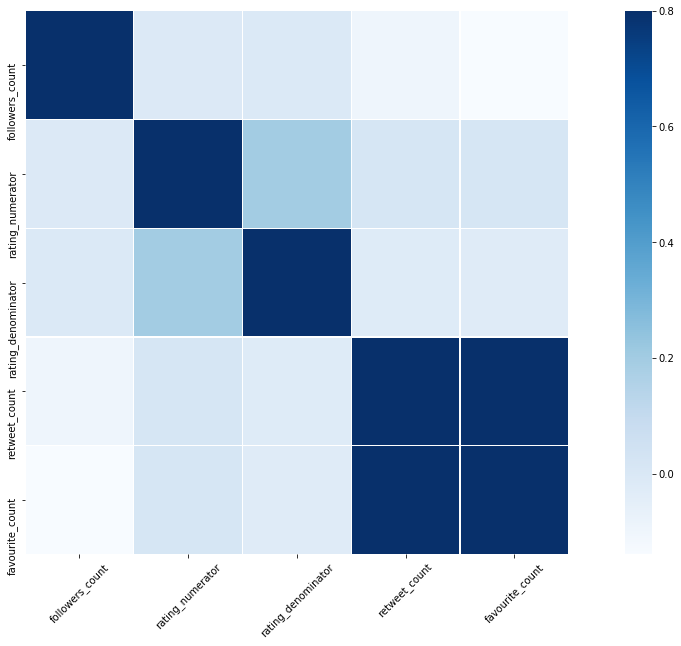

In [92]:
# Correlation between numerical variables
num_cols_data = (archive_clean_df[['followers_count', 'rating_numerator', 'rating_denominator', 'retweet_count','favourite_count']])
matrix = num_cols_data.corr()
f, ax = plt.subplots(figsize=(20, 10))

plt.xticks(rotation=45,)
plt.yticks(rotation=45,)


sns.heatmap(matrix, vmax=.8, square=True, cmap="Blues", linewidths=.2, );



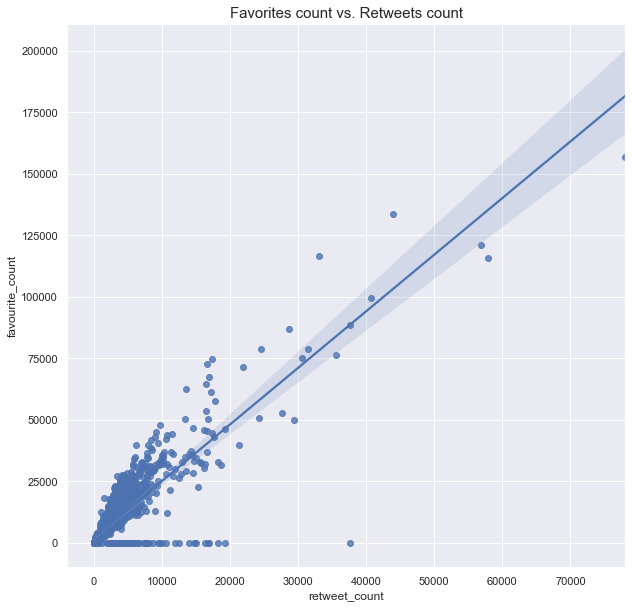

In [94]:
# Favorites count vs. Retweets count" detail

sns.set(style="darkgrid")
graph = sns.regplot(x=archive_clean_df.retweet_count, y=archive_clean_df.favourite_count)
plt.title("Favorites count vs. Retweets count", fontsize=15)
plt.xlabel('retweet_count', fontsize=12)
plt.ylabel('favourite_count', fontsize=12)
plt.rc('grid', linestyle="-", color='gray')
plt.rcParams['figure.figsize'] = 10, 10

fig = graph.get_figure()


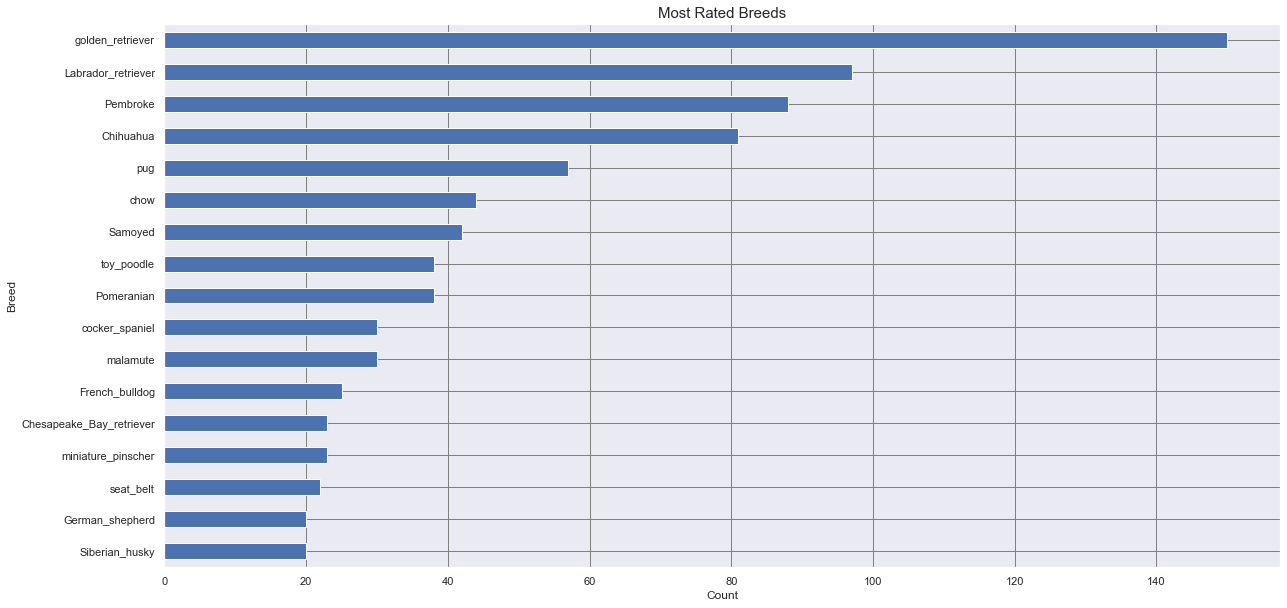

In [96]:
# TOP Breeds
top_breeds=archive_clean_df.groupby('p1').filter(lambda x: len(x) >= 20)
top_breeds['p1'].value_counts().plot(kind = 'barh')
plt.title('Most Rated Breeds', fontsize=15)
plt.xlabel('Count', fontsize=12)
plt.ylabel('Breed', fontsize=12)
plt.gca().invert_yaxis()
plt.rcParams['figure.figsize'] = 20, 10


In [97]:
archive_clean_df['p1_dog'].value_counts()

True     1520
False     539
Name: p1_dog, dtype: int64

In [98]:
archive_clean_df['p2_dog'].value_counts()

True     1540
False     519
Name: p2_dog, dtype: int64

In [99]:
archive_clean_df['p3_dog'].value_counts()

True     1487
False     572
Name: p3_dog, dtype: int64

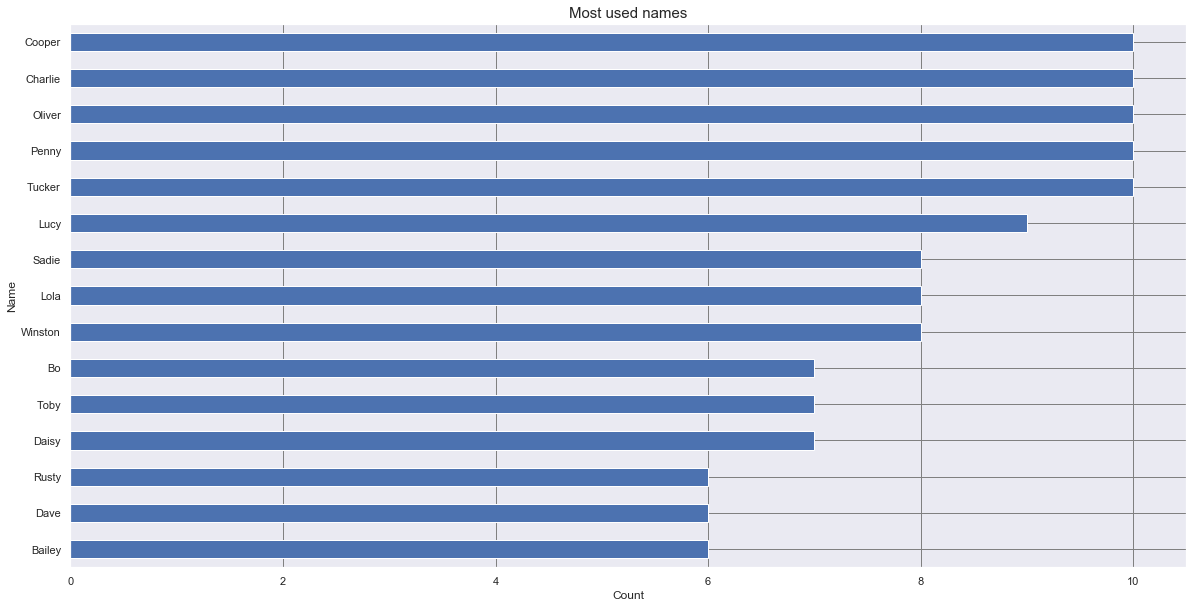

In [100]:
#Most used names
top_names = archive_clean_df.name.value_counts()
top_names[:15].plot(kind='barh')
plt.title('Most used names',fontsize=15)
plt.rcParams['figure.figsize'] = 20, 10
plt.gca().invert_yaxis()
plt.xlabel('Count', fontsize=12);
plt.ylabel('Name', fontsize=12);


In [101]:
archive_clean_df['name'].value_counts().sort_values()

 Kohl       1
Sprout      1
Zoe         1
Dewey       1
Monster     1
           ..
Tucker     10
Penny      10
Oliver     10
Charlie    10
Cooper     10
Name: name, Length: 935, dtype: int64

In [102]:
#Dog stage count
archive_clean_df['dog_stage'].value_counts().sort_values()

doggo, puppo        1
doggo, floofer      1
floofer             7
doggo, pupper      11
puppo              23
doggo              65
pupper            210
Name: dog_stage, dtype: int64

<a id='Resources'></a>
## Resources

<a id="[1]">[1]</a> <a href="https://sfm.readthedocs.io/en/2.2.0/data_dictionary.html">Data Dictionaries for CSV/Excel Exports</a>

<a id="[2]">[2]</a>  <a href="https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object">Tweet objects</a> 

<a id="[3]">[3]</a> <a href="https://support.birdiq.net/knowledge-base/twitter-tweet-columns">What Do The Tweet Columns Mean?</a>

<a id="[4]">[4]</a> <a href="https://classroom.udacity.com/nanodegrees/nd002-ent/parts/f55ce890-c08c-46a5-b57f-55a06c1cc6ae/modules/a8fcd18c-b9a5-4852-a7ec-6dbb08ebfe5a/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576">UDACITY - Data Analyst NanoDegree, Part - Wrangle and Analyze Data, Project Motivation</a>

<a id="[5]">[5]</a> <a href="https://classroom.udacity.com/nanodegrees/nd002-ent/parts/f55ce890-c08c-46a5-b57f-55a06c1cc6ae/modules/a8fcd18c-b9a5-4852-a7ec-6dbb08ebfe5a/lessons/a8085857-3e28-4fc7-aeb8-da64ccbc2e20/concepts/28d4643b-3785-4700-bdee-4e5fc9963576">StackOverFlow - Database Design Primay Key, ID vs String</a>

<a id="[6]">[6]</a> <a href="https://sqlinthewild.co.za">SQL in the Wild</a>

